# Report of Lab 3: Linear Regression
### By “Aseem Shaikh - 3177031”
### Introduction
#### Information: The primary objective of this lab exercise is to develop a predictive model for estimating the miles per gallon (mpg) of cars using various descriptive features from the Auto dataset. The tasks involved in this lab aim to enhance understanding and practical skills in applying linear regression techniques. Specifically, the objectives are Simple Linear Regression, Multiple Linear Regression, and investigate Non-Linear Relationships. 
#### Link to Dataset: [Auto](https://islp.readthedocs.io/en/main/datasets/Auto.html)
#### Defination of each column
- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

### Import Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

auto_df = pd.read_csv('Auto.csv')

### Data Exploration

In [20]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [22]:
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


In [23]:
#Null Values
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [24]:
for col in auto_df.columns:
    print(col)
    print(auto_df[col].unique())

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cylinders
[8 4 6 3 5]
displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262. 

### Data Cleaning

In [25]:
#converting missing values by the mean of the column data.
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
mean_horsepower = auto_df['horsepower'].mean()
auto_df['horsepower'].fillna(mean_horsepower, inplace=True)

### Simple Linear Regression Model

In [26]:
descriptive_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
response_variable = 'mpg'

def apply_simple_regression(df, x_name, y_name):
    # Get the descriptive feature and response variable
    x = df[x_name]
    y = df[y_name]

    # Fit the simple regression model
    model = sm.OLS(y, sm.add_constant(x))
    result = model.fit()

    # Print the summary statistics of the model
    print(f"Summary Statistics for {x_name}:")
    print(result.summary())
    print("-----------------------")
    
     # Visualize the relationship between x and y
    plt.scatter(x, y, marker='o', color='black')
    plt.plot(x, result.fittedvalues, color='red', linewidth=2)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f"Relationship between {y_name} and {x_name}")
    plt.legend({x_name})
    plt.show()

Summary Statistics for cylinders:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     598.9
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           3.67e-81
Time:                        20:41:31   Log-Likelihood:                -1196.4
No. Observations:                 397   AIC:                             2397.
Df Residuals:                     395   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0

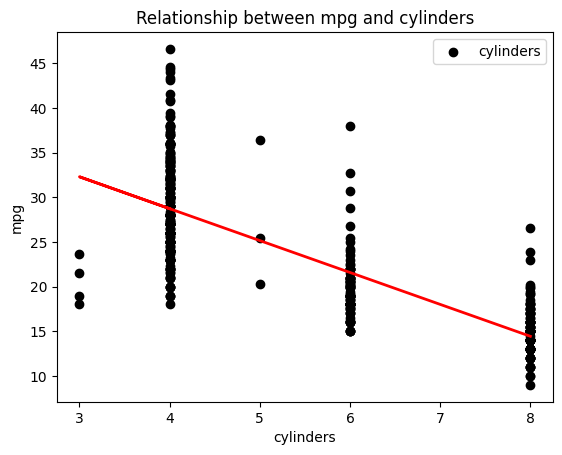

Summary Statistics for displacement:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     724.4
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.25e-91
Time:                        20:41:31   Log-Likelihood:                -1172.8
No. Observations:                 397   AIC:                             2350.
Df Residuals:                     395   BIC:                             2358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

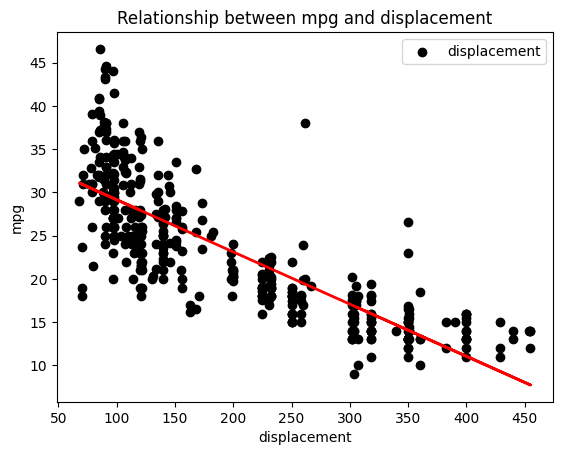

Summary Statistics for horsepower:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.45e-79
Time:                        20:41:31   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.

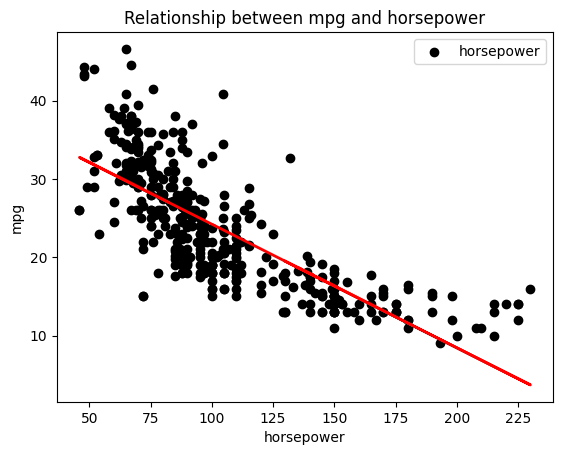

Summary Statistics for weight:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     886.6
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          5.37e-103
Time:                        20:41:32   Log-Likelihood:                -1146.0
No. Observations:                 397   AIC:                             2296.
Df Residuals:                     395   BIC:                             2304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174

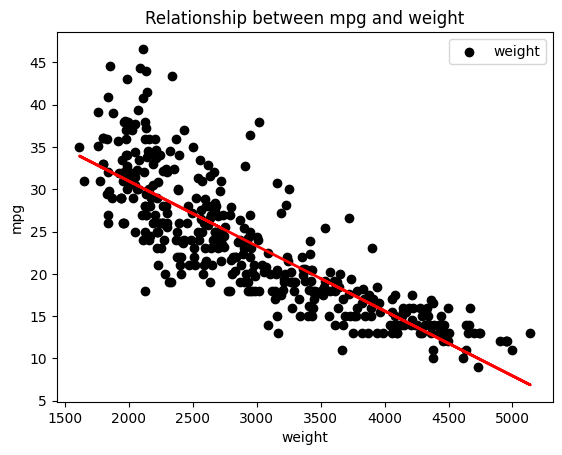

Summary Statistics for acceleration:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     85.73
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.33e-18
Time:                        20:41:32   Log-Likelihood:                -1340.6
No. Observations:                 397   AIC:                             2685.
Df Residuals:                     395   BIC:                             2693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const      

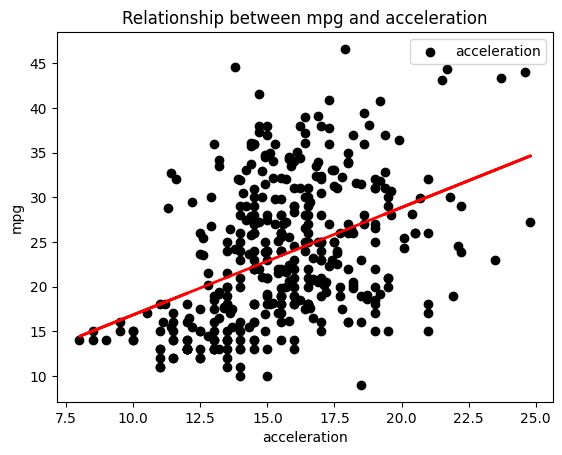

Summary Statistics for year:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     201.8
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           2.77e-37
Time:                        20:41:33   Log-Likelihood:                -1297.7
No. Observations:                 397   AIC:                             2599.
Df Residuals:                     395   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -70.2001  

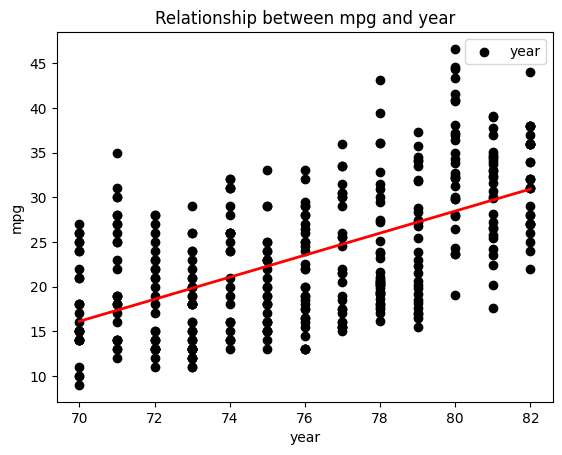

Summary Statistics for origin:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.13e-34
Time:                        20:41:34   Log-Likelihood:                -1303.7
No. Observations:                 397   AIC:                             2611.
Df Residuals:                     395   BIC:                             2619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8623

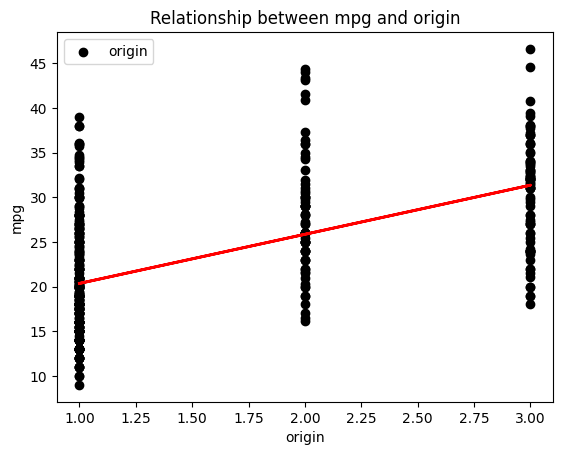

In [27]:
for feature in descriptive_features:
    apply_simple_regression(auto_df, feature, response_variable)

### Summary of Linear Regression
Based on the statistical measures provided, we can rank the features by their importance. The key criteria are:

- **R-squared value**: Higher values indicate greater explanatory power.
- **t-value and p-value**: Higher t-values and lower p-values indicate greater statistical significance.
- **Coefficient magnitude**: Reflects the strength of the relationship with mpg.

1. **Weight**
   - **R-squared**: 0.692 (highest explanatory power)
   - **Coefficient**: -0.0077
   - **t-value**: -29.776
   - **p-value**: 0.000

2. **Displacement**
   - **R-squared**: 0.647
   - **Coefficient**: -0.0603
   - **t-value**: -26.914
   - **p-value**: 0.000

3. **Cylinders**
   - **R-squared**: 0.603
   - **Coefficient**: -3.5701
   - **t-value**: -24.473
   - **p-value**: 0.000

4. **Horsepower**
   - **R-squared**: 0.595
   - **Coefficient**: -0.1578
   - **t-value**: -24.096
   - **p-value**: 0.000

These features are selected based on their high R-squared values, significant coefficients, and strong t-values, indicating they have the most substantial impact on mpg. Weight, displacement, cylinders, and horsepower are the most important features affecting fuel efficiency in this dataset.

### Multiple Linear Regression Model

In [28]:
model_lin = sm.OLS.from_formula("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto_df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          2.41e-141
Time:                        20:41:34   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary of the Multiple Regression

#### Model Fit:
- **High Explanatory Power**: The model explains a substantial portion of the variability in the dependent variable (mpg), as indicated by a high R-squared value of 0.903 and an adjusted R-squared of 0.871. This means the model is effective at predicting the mpg based on the independent variables included.

#### Significant Predictors:
- **Weight**: 
  - The coefficient for weight is -0.0040, with a very low p-value (0.000), indicating a statistically significant negative relationship between weight and mpg. Heavier cars tend to have lower mpg.
  
- **Acceleration**:
  - The coefficient for acceleration is -0.2356 with a p-value of 0.028, indicating a statistically significant negative relationship. Faster acceleration is associated with lower mpg.

- **Year**:
  - The coefficient for year is 0.7164 with a p-value of 0.000, indicating a statistically significant positive relationship. Newer cars tend to have higher mpg, likely due to advancements in automotive technology and fuel efficiency improvements over time.

- **Origin**:
  - The coefficient for origin is 1.3733 with a p-value of 0.000, indicating a statistically significant positive relationship. Cars originating from certain regions tend to have higher mpg.

#### Horsepower:
- The model includes numerous dummy variables for different horsepower levels. Several of these dummy variables are statistically significant, indicating that certain horsepower categories have a significant impact on mpg. For example:
  - **horsepower[T.48]** (17.3783, p-value = 0.000)
  - **horsepower[T.52]** (7.8314, p-value = 0.000)
  - **horsepower[T.58]** (8.4410, p-value = 0.000)
  - **horsepower[T.65]** (7.6101, p-value = 0.000)

  These results show that cars with specific horsepower ratings have significantly different mpg values, both positively and negatively.

#### Overall Conclusions:
- **Key Determinants of MPG**: Weight, year, origin, and acceleration are significant determinants of fuel efficiency (mpg). Among these, weight and year have the most substantial impact.
- **Effect of Horsepower**: Certain horsepower levels significantly impact mpg, indicating that not all horsepower ratings affect fuel efficiency equally.
- **Potential Multicollinearity**: Care must be taken with the interpretation of coefficients due to potential multicollinearity.
- **Model Reliability**: While the model explains a high proportion of the variance in mpg, non-normality of residuals and multicollinearity could affect the robustness of the results. Further diagnostics and potential model adjustments might be necessary for more precise estimates.

In [29]:
# MLR with 4 significant features in the model
model_lin = sm.OLS.from_formula("mpg ~ displacement + weight + year + origin", data=auto_df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     442.7
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          6.63e-144
Time:                        20:41:34   Log-Likelihood:                -1040.6
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     392   BIC:                             2111.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.8410      3.992     -4.720      0.000     -26.689     -10.993
displacement     0.0061      0.005      1.280      0.201      -0.003       0.015
weight          -0.0067      0.001    -11.980      0.000      -0.008      -0.006
year             0.7765      0.049     15.700      0.000       0.679       0.874
origin           1.2345      0.265      4.653      0.000       0.713       1.756
==============================================================================
Omnibus:                       36.606   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.756
Skew:                           0.548   Prob(JB):                     1.17e-15
Kurtosis:                       4.720   Cond. No.                     7.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comparision

In [30]:
# Set the descriptive features and response variable
X = auto_df[['cylinders', 'displacement', 'weight', 'horsepower' ,'acceleration', 'year', 'origin']]
y = auto_df['mpg']

# Fit simple linear regression models
fit_cylinders = sm.OLS(y, sm.add_constant(X['cylinders'])).fit()
fit_displacement = sm.OLS(y, sm.add_constant(X['displacement'])).fit()
fit_horsepower = sm.OLS(y, sm.add_constant(X['horsepower'])).fit()
fit_weight = sm.OLS(y, sm.add_constant(X['weight'])).fit()
fit_acceleration = sm.OLS(y, sm.add_constant(X['acceleration'])).fit()
fit_year = sm.OLS(y, sm.add_constant(X['year'])).fit()
fit_origin = sm.OLS(y, sm.add_constant(X['origin'])).fit()

# Coefficients from simple linear regression models
simple_reg = [
    fit_cylinders.params[1],
    fit_displacement.params[1],
    fit_horsepower.params[1],
    fit_weight.params[1],
    fit_acceleration.params[1],
    fit_year.params[1],
    fit_origin.params[1]
]

In [31]:
# Fit multiple regression model
model_all = sm.OLS(y, sm.add_constant(X))
fit_all = model_all.fit()

# coefficients from multiple regression model
mult_reg = fit_all.params[1:]

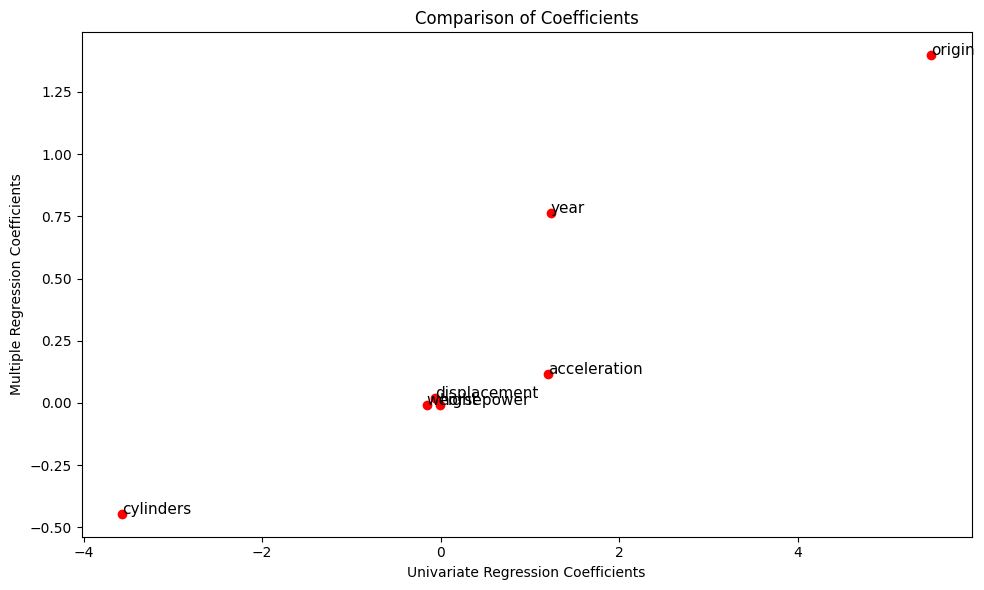

In [32]:
# plotting the simple linear regression models vs multiple regression model

common_predictors = X.columns.intersection(fit_all.model.exog_names[1:])
plt.figure(figsize=(10, 6))
plt.scatter(simple_reg, mult_reg.loc[common_predictors], color='red')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Coefficients')

# Add labels to the plot
for i, predictor in enumerate(common_predictors):
    x = simple_reg[i]
    y = mult_reg.loc[predictor]
    label = predictor
    plt.text(x, y, label, fontsize=11)
plt.tight_layout()
plt.show()

### Summary of Results:
The scatter plot titled "Comparison of Coefficients" compares the coefficients from a multiple regression model against those from univariate regression models for different variables. Here's a summary of the results based on the plot:

### Interpretation of the Scatter Plot:
1. **Axes**:
   - **X-axis**: Coefficients from univariate regression models.
   - **Y-axis**: Coefficients from the multiple regression model.

2. **Variables Plotted**:
   - **Cylinders**: The coefficient is slightly negative in both univariate and multiple regression, indicating that more cylinders are weakly associated with lower mpg.
   - **Displacement**: The coefficients are close to zero in both models, indicating a weak relationship with mpg.
   - **Weight**: The coefficient is negative in both models, with a more pronounced negative effect in the multiple regression model, confirming that higher weight leads to lower mpg.
   - **Acceleration**: The coefficient is negative in the multiple regression model, indicating that faster acceleration is associated with lower mpg. The effect is less pronounced in the univariate model.
   - **Year**: The coefficient is positive in both models, indicating that newer cars tend to have higher mpg. The effect is stronger in the multiple regression model.
   - **Origin**: The coefficient is positive and significantly higher in the multiple regression model compared to the univariate model, indicating that cars from certain origins have higher mpg when controlling for other variables.


- **Consistent Effects**: The variables weight, acceleration, year, and origin show consistent directions of effects in both univariate and multiple regression models.
  - **Weight**: Negative impact on mpg.
  - **Acceleration**: Negative impact on mpg.
  - **Year**: Positive impact on mpg.
  - **Origin**: Positive impact on mpg.

### Non-Linear Association

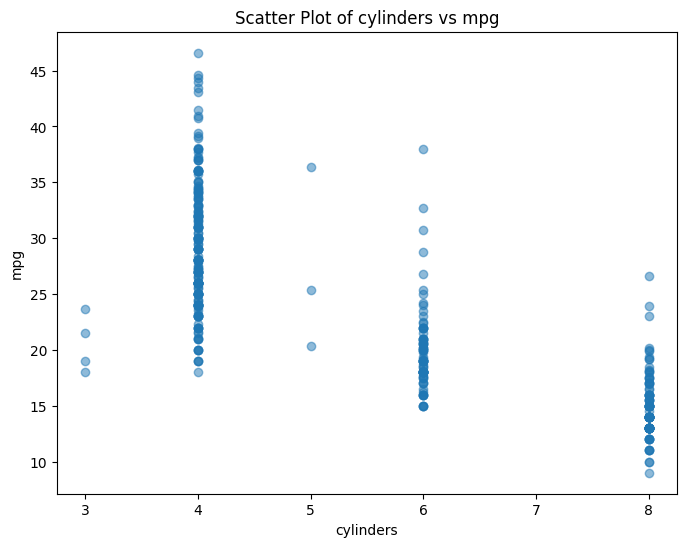

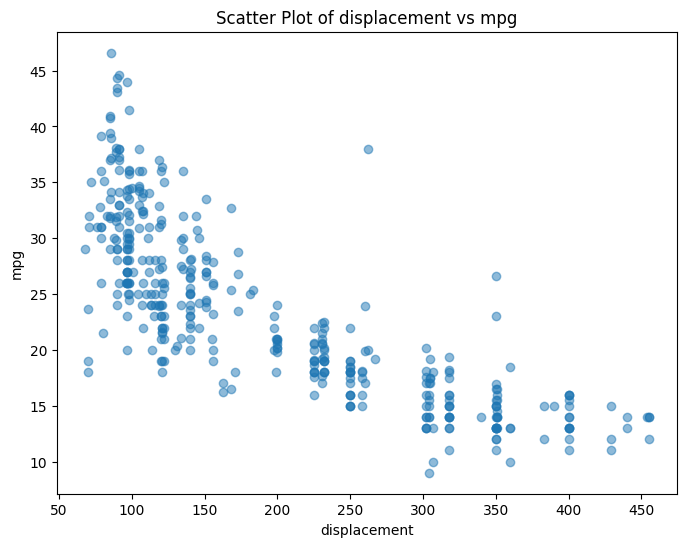

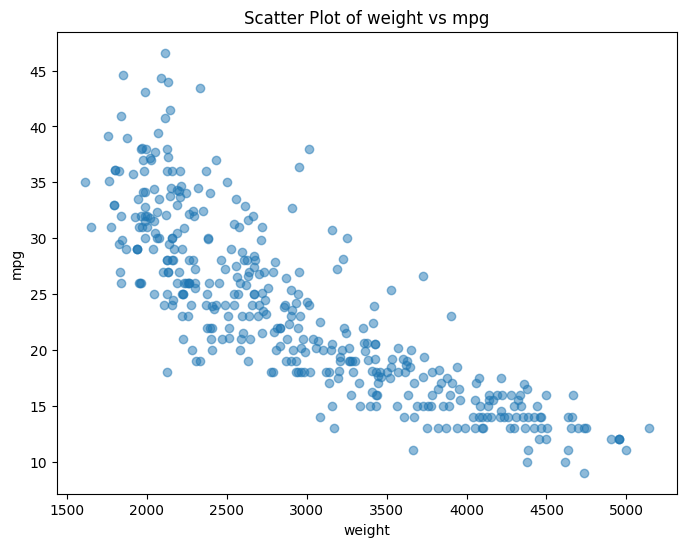

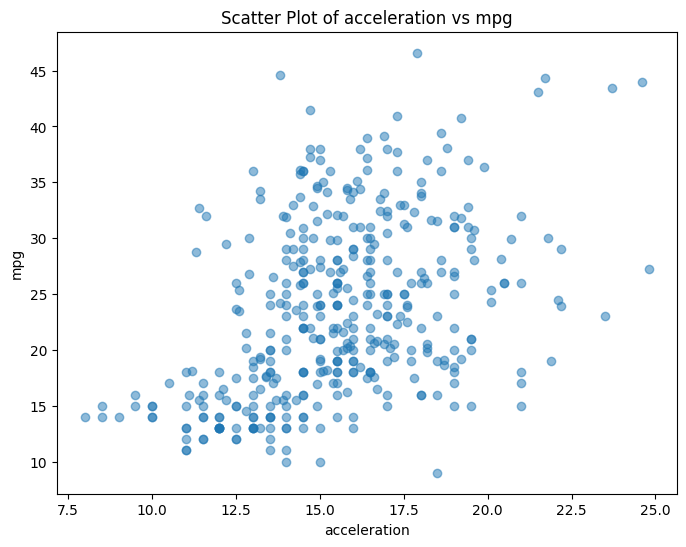

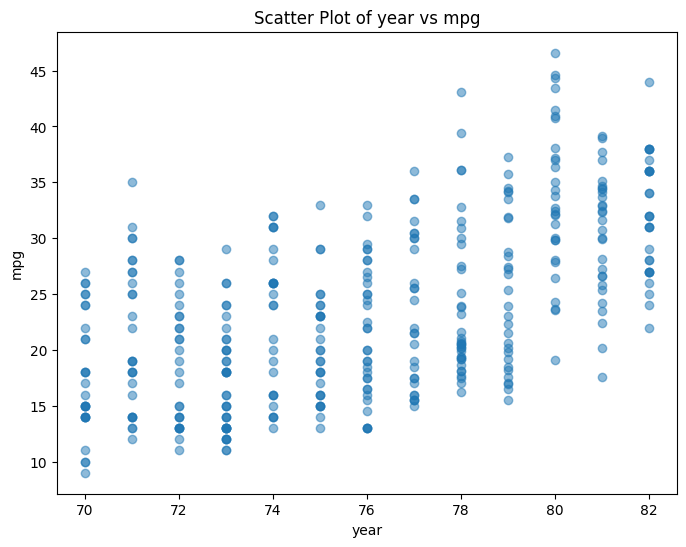

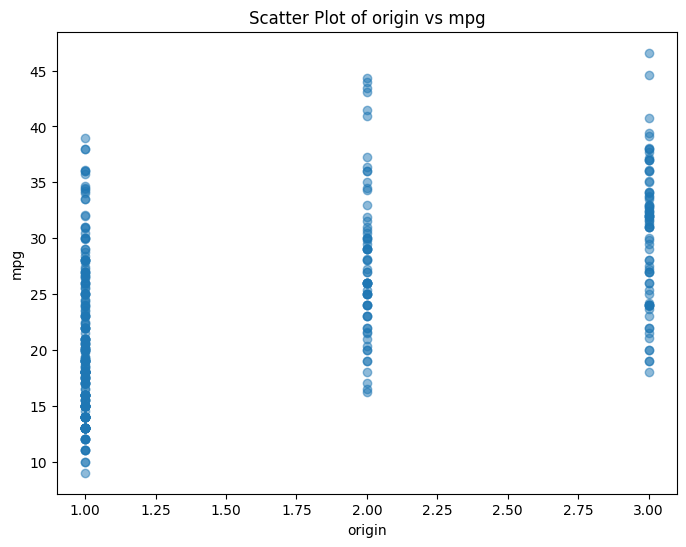

      Predictor  R2 Linear  R2 Polynomial  Improvement
0     cylinders   0.602580       0.605400     0.002821
1  displacement   0.647129       0.688578     0.041450
2        weight   0.691790       0.714850     0.023060
3  acceleration   0.178335       0.193856     0.015520
4          year   0.338107       0.369357     0.031250
5        origin   0.317755       0.333209     0.015454


In [34]:
predictors = ['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
response = 'mpg'

# Generate scatter plots
for predictor in predictors:
    plt.figure(figsize=(8, 6))
    plt.scatter(auto_df[predictor], auto_df[response], alpha=0.5)
    plt.title(f'Scatter Plot of {predictor} vs {response}')
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.show()

# Fit and compare polynomial regression models
results = []
for predictor in predictors:
    X = auto_df[[predictor]]
    y = auto_df[response]
    
    # Linear model
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)
    r2_lin = r2_score(y, y_pred_lin)
    
    # Polynomial model (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)
    
    results.append({
        'Predictor': predictor,
        'R2 Linear': r2_lin,
        'R2 Polynomial': r2_poly,
        'Improvement': r2_poly - r2_lin
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


### Summary of Non-Linear Association

- As the number of cylinders increases, there is a clear decrease in MPG. However, this relationship is not perfectly linear; the decrease in MPG is more pronounced at certain cylinder counts.
- The relationship appears to be non-linear, especially at lower displacement values. The decrease in MPG is more rapid with smaller increases in displacement at the lower end of the scale.
- Weight also shows linear relationship towards mpg
- year and origin also show relationship towards mpg